In [1]:
%matplotlib notebook
import math
import random as rd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

def arraysFromDots(points):
    xarr = []
    yarr = []
    for point in points:
        x, y = point
        xarr.append(x)
        yarr.append(y)
    xarr.append(points[0][0])
    yarr.append(points[0][1])
    return (xarr, yarr)

In [2]:
class SAO:
    
    def __init__(self, points, maxT=100, minT=0.1):
        
        self.points = points       # Текущий путь
        self.pointsQ = len(points) # Количество точек в пути
        self.temp = maxT           # Текущая температура
        self.minT = minT           # Минимальная температура

        self.paths = [self.points]                # Путь на каждой итерации
        self.dists = [self.pathDist(self.points)] # Длина пути на каждой итерации
        self.temps = [self.temp]                  # Температура на каждой итерации
        
        self.bestDist = self.dists[0]             # Лучшая дистанция
        self.bestDists = [self.bestDist]          # Лучшая дистанция на каждой итерации
        
    
    # Генерация нового пути
    def getNewPoints(self, points):
        newP = np.copy(self.points)
        f = rd.randint(0, self.pointsQ-1)
        l = rd.randint(0, self.pointsQ-1)
        while l == f:
            l = rd.randint(0, self.pointsQ-1)
        newP[f], newP[l] = newP[l], newP[f].copy()
        return newP

    
    # Расстояние между точками
    def dist(self, a, b):
        x1, y1 = a
        x2, y2 = b
        return ((x2-x1)**2 + (y2-y1)**2)**0.5
    
    
    # Длина пути
    def pathDist(self, points):
        res = 0
        for i in range(-1, self.pointsQ-1):
            res += self.dist(points[i], points[i+1])
        return res

    
    # Уменьшение температуры
    def decreaseTemp(self, temp):
        return self.temp * 0.999

    
    # Алгоритм отжига
    def execute(self):
        
        while self.temp > self.minT:
            
            # Получение нового пути
            newPoints = self.getNewPoints(self.points)
            
            # Текущая длина пути
            currDist = self.pathDist(self.points)
            
            # Разница между длинной текущего пути и длинной нового пути
            dE = self.pathDist(newPoints) - currDist
            
            # Если новый путь меньше, принимаем его
            if dE <= 0:
                self.points = newPoints
            
            # Если больше, принимаем с вероятностью p вычисленной по формуле
            else:
                p = self.temp*(math.e)**(-dE/self.temp)
                if p >= rd.randint(1, 100):
                    self.points = newPoints
            
            # Уменьшение температуры
            self.temp = self.decreaseTemp(self.temp)
            
            # Обновление данных
            if currDist < self.bestDist:
                self.bestDist = currDist
            self.bestDists.append(self.bestDist)
            self.paths.append(self.points)
            self.dists.append(currDist)
            self.temps.append(self.temp)

In [3]:
orig_points = np.random.rand(20, 2)

In [4]:
start_points = orig_points.copy()
maxT = 100
minT = 0.1

sao = SAO(start_points, maxT, minT)
sao.execute()

paths = sao.paths
dists = sao.dists
bestDists = sao.bestDists
temps = sao.temps

In [5]:
print(f'Начальный путь: \n{paths[0]}\n')
print(f'Начальная дистанция: {dists[0]}\n\n')

for i in range(0, len(paths), 100):
    print(f'Итерация: {i} Расстояние: {round(dists[i], 3)} Температура: {round(temps[i], 3)}')
      
print(f'\n\nКонечный путь: \n{paths[-1]}\n')
print(f'Конечная дистанция: {dists[-1]}')

Начальный путь: 
[[2.09496246e-01 2.70026626e-03]
 [7.21964152e-01 9.13502342e-01]
 [7.35618645e-01 1.61958445e-01]
 [3.77654327e-01 7.05018403e-01]
 [6.96892688e-02 6.35536736e-01]
 [9.04685701e-01 2.54120153e-01]
 [8.80593312e-01 7.48059291e-01]
 [7.58844508e-01 5.95404020e-01]
 [5.24872806e-01 4.52298281e-01]
 [4.93859446e-01 3.85803755e-01]
 [9.73463820e-01 2.52582245e-01]
 [7.51866825e-01 9.30572517e-01]
 [2.02763659e-01 3.27760118e-01]
 [3.22826960e-02 9.34902250e-01]
 [7.45021206e-01 6.18811560e-03]
 [1.86494710e-01 6.59234237e-01]
 [9.19834264e-01 8.89934883e-01]
 [2.11022251e-01 4.06602056e-01]
 [3.68758128e-01 4.61752914e-01]
 [3.29804197e-01 1.17480735e-04]]

Начальная дистанция: 11.78277023742175


Итерация: 0 Расстояние: 11.783 Температура: 100
Итерация: 100 Расстояние: 10.542 Температура: 90.479
Итерация: 200 Расстояние: 12.126 Температура: 81.865
Итерация: 300 Расстояние: 10.145 Температура: 74.071
Итерация: 400 Расстояние: 9.537 Температура: 67.019
Итерация: 500 Расстоя

<IPython.core.display.Javascript object>


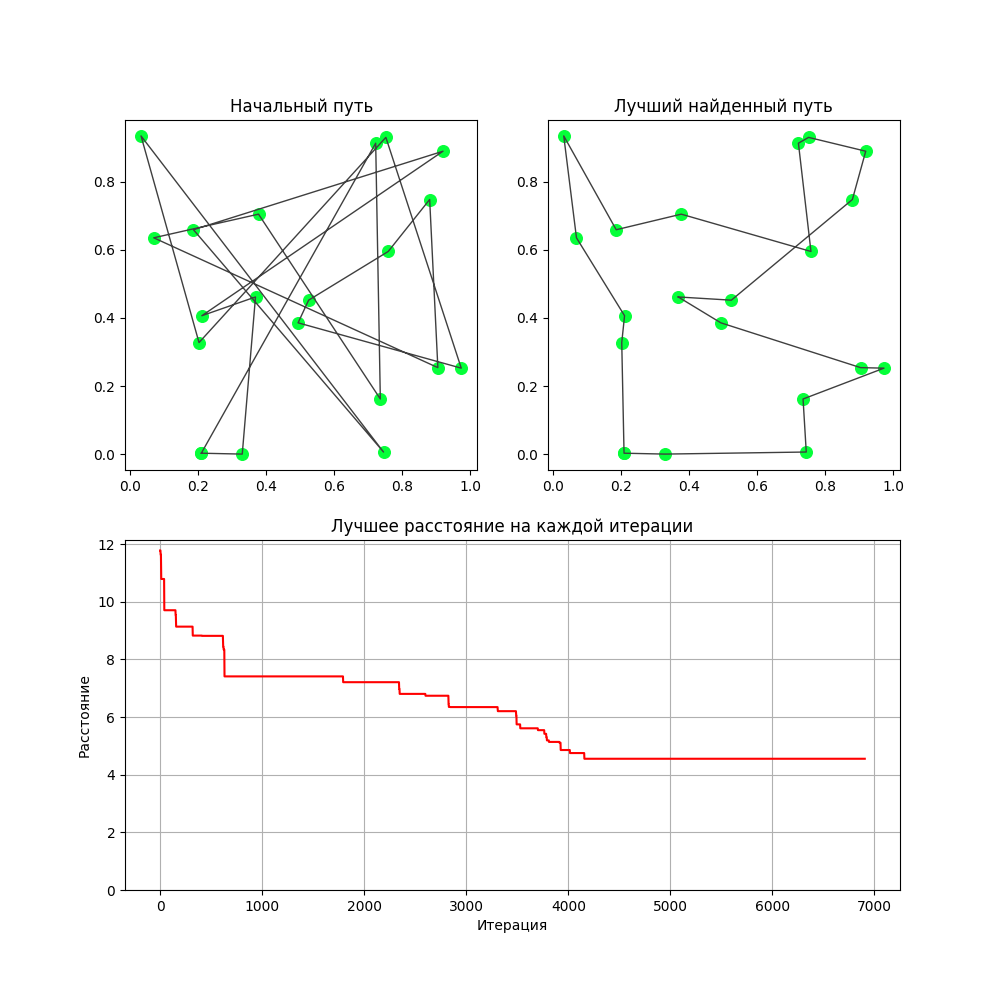

In [6]:
xCoords, yCoords = arraysFromDots(start_points)

fig = plt.figure(figsize=(10, 10))
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, (3, 4))
ax1.set_title('Начальный путь')
ax2.set_title('Лучший найденный путь')
ax1.scatter(xCoords, yCoords, c='#05FF39', s=70)
ax2.scatter(xCoords, yCoords, c='#05FF39', s=70)
ax1.plot(xCoords, yCoords, color='#3f3f3f', linewidth=1)

xCoords, yCoords = arraysFromDots(paths[-1])

ax2.plot(xCoords, yCoords, color='#3f3f3f', linewidth=1)

ax3.set_title('Лучшее расстояние на каждой итерации')
ax3.plot(bestDists, color='red', linewidth=1.5)
ax3.set_xlabel('Итерация')
ax3.set_ylabel('Расстояние')
ax3.set_ylim(0)
ax3.grid()

<IPython.core.display.Javascript object>


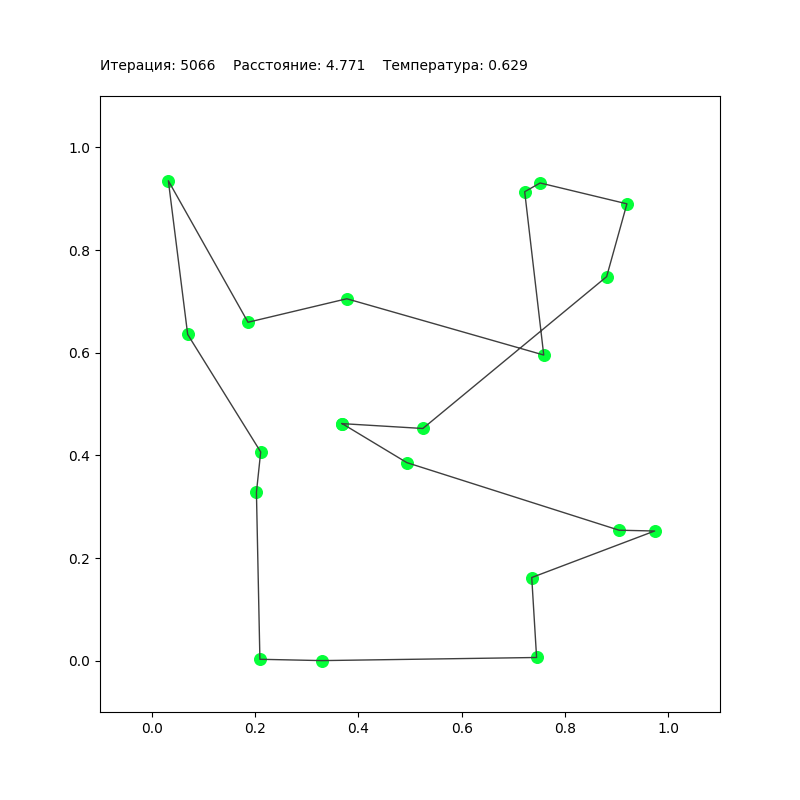

In [7]:
figA = plt.figure(figsize=(8, 8))
axA = figA.add_subplot()

axA.scatter(xCoords, yCoords, c='#05FF39', s=70)
line, = axA.plot([], color='#3f3f3f', linewidth=1)
temp = axA.text(-0.1, 1.15, '')

plt.xlim(-0.1, 1.1)
plt.ylim(-0.1, 1.1)

def animate(i):
    x, y = arraysFromDots(paths[i])
    temp.set_text(f'Итерация: {i}    Расстояние: {round(dists[i], 3)}    Температура: {round(temps[i], 3)}')
    line.set_data((x, y))
    
anim = FuncAnimation(figA, animate, frames=len(paths), interval=2, repeat=False)

# anim.save('annealing.gif', writer='imagemagick', fps=60)

In [ ]:
%matplotlib notebook
import math
import random as rd
import numpy as np
from scipy import spatial
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation


# Координаты для графиков
def arraysFromDots(points):
    xarr = []
    yarr = []
    for point in points:
        x, y = point
        xarr.append(x)
        yarr.append(y)
    xarr.append(points[0][0])
    yarr.append(points[0][1])
    return (xarr, yarr)


class SAO:
    
    def __init__(self, points, maxT=100, minT=0.1):
        
        self.points = points       # Текущий путь
        self.pointsQ = len(points) # Количество точек в пути
        self.temp = maxT           # Текущая температура
        self.minT = minT           # Минимальная температура

        self.paths = [self.points]                # Путь на каждой итерации
        self.dists = [self.pathDist(self.points)] # Длина пути на каждой итерации
        self.temps = [self.temp]                  # Температура на каждой итерации
        
        self.bestDist = self.dists[0]             # Лучшая дистанция
        self.bestDists = [self.bestDist]          # Лучшая дистанция на каждой итерации
        
    
    # Генерация нового пути
    def getNewPoints(self, points):
        newP = np.copy(self.points)
        f = rd.randint(0, self.pointsQ-1)
        l = rd.randint(0, self.pointsQ-1)
        while l == f:
            l = rd.randint(0, self.pointsQ-1)
        newP[f], newP[l] = newP[l], newP[f].copy()
        return newP

    
    # Расстояние между точками
    def dist(self, a, b):
        x1, y1 = a
        x2, y2 = b
        return ((x2-x1)**2 + (y2-y1)**2)**0.5
    
    
    # Длина пути
    def pathDist(self, points):
        res = 0
        for i in range(-1, self.pointsQ-1):
            res += self.dist(points[i], points[i+1])
        return res

    
    # Уменьшение температуры
    def decreaseTemp(self, temp):
        return self.temp * 0.999

    
    # Алгоритм отжига
    def execute(self):
        
        while self.temp > self.minT:
            
            # Получение нового пути
            newPoints = self.getNewPoints(self.points)
            
            # Текущая длина пути
            currDist = self.pathDist(self.points)
            
            # Разница между длинной текущего пути и длинной нового пути
            dE = self.pathDist(newPoints) - currDist
            
            # Если новый путь меньше, принимаем его
            if dE <= 0:
                self.points = newPoints
            
            # Если больше, принимаем с вероятностью p вычисленной по формуле
            else:
                p = self.temp*(math.e)**(-dE/self.temp)
                if p >= rd.randint(1, 100):
                    self.points = newPoints
            
            # Уменьшение температуры
            self.temp = self.decreaseTemp(self.temp)
            
            # Обновление данных
            if currDist < self.bestDist:
                self.bestDist = currDist
            self.bestDists.append(self.bestDist)
            self.paths.append(self.points)
            self.dists.append(currDist)
            self.temps.append(self.temp)
            

# Инициализация начального пути и параметров
orig_points = np.random.rand(20, 2)
start_points = orig_points.copy()
maxT = 100
minT = 0.1

# Запуск алгоритма
sao = SAO(start_points, maxT, minT)
sao.execute()

# Выходные данные
paths = sao.paths
dists = sao.dists
bestDists = sao.bestDists
temps = sao.temps


# Вывод результатов
print(f'Начальный путь: \n{paths[0]}\n')
print(f'Начальная дистанция: {dists[0]}\n\n')

for i in range(0, len(paths), 100):
    print(f'Итерация: {i} Расстояние: {round(dists[i], 3)} Температура: {round(temps[i], 3)}')
      
print(f'\n\nКонечный путь: \n{paths[-1]}\n')
print(f'Конечная дистанция: {dists[-1]}')


# Графики
xCoords, yCoords = arraysFromDots(start_points)

fig = plt.figure(figsize=(10, 10))
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, (3, 4))
ax1.set_title('Начальный путь')
ax2.set_title('Лучший найденный путь')
ax1.scatter(xCoords, yCoords, c='#05FF39', s=70)
ax2.scatter(xCoords, yCoords, c='#05FF39', s=70)
ax1.plot(xCoords, yCoords, color='#3f3f3f', linewidth=1)

xCoords, yCoords = arraysFromDots(paths[-1])

ax2.plot(xCoords, yCoords, color='#3f3f3f', linewidth=1)

ax3.set_title('Лучшее расстояние на каждой итерации')
ax3.plot(bestDists, color='red', linewidth=1.5)
ax3.set_xlabel('Итерация')
ax3.set_ylabel('Расстояние')
ax3.set_ylim(0)
ax3.grid()


# Анимация
figA = plt.figure(figsize=(8, 8))
axA = figA.add_subplot()

axA.scatter(xCoords, yCoords, c='#05FF39', s=70)
line, = axA.plot([], color='#3f3f3f', linewidth=1)
temp = axA.text(-0.1, 1.15, '')

plt.xlim(-0.1, 1.1)
plt.ylim(-0.1, 1.1)

def animate(i):
    x, y = arraysFromDots(paths[i])
    temp.set_text(f'Итерация: {i}    Расстояние: {round(dists[i], 3)}    Температура: {round(temps[i], 3)}')
    line.set_data((x, y))
    
anim = FuncAnimation(figA, animate, frames=len(paths), interval=2, repeat=False)